Build a Neural Network in Pytorch

In [1]:
import torch
import torch.nn as nn
from torch import sigmoid

In [4]:
class net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)
  def forward(self,x):
    out1 = sigmoid(self.linear1(x))
    out2 = sigmoid(self.linear2(out1))
    return out2


In [14]:
model = net(1,2,1)
print(model.state_dict())
model.state_dict()['linear1.weight'].shape

OrderedDict([('linear1.weight', tensor([[ 0.5292],
        [-0.1855]])), ('linear1.bias', tensor([ 0.4170, -0.0466])), ('linear2.weight', tensor([[-0.6591, -0.2744]])), ('linear2.bias', tensor([0.4638]))])


torch.Size([2, 1])

In [6]:
x = torch.tensor([0.0])

In [7]:
yhat = model(x)

In [8]:
print(yhat)

tensor([0.4581], grad_fn=<SigmoidBackward0>)


one hidden layer using nn.Sequential

In [17]:
model_seq = nn.Sequential(nn.Linear(1,2),nn.Sigmoid(),nn.Linear(2,1),nn.Sigmoid())

In [18]:
yhat = model_seq(x)
print(yhat)

tensor([0.6156], grad_fn=<SigmoidBackward0>)


train the model

In [29]:
x = torch.arange(-20.20,1).view(-1,1).type(torch.FloatTensor)

In [30]:
y = torch.zeros(x.shape[0])

In [31]:
y[(x[:,0]>-4)&(x[:,0]<4)] = 1.0

In [32]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [33]:
model_pre = net(1,2,1)

In [37]:
cost = []
accuracy = []
epochs = 10

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total_samples = 0

    for x_sample, y_sample in zip(x, y):
        optimizer.zero_grad()

        y_sample = y_sample.unsqueeze(0)       # Shape: [1]
        yhat = model_pre(x_sample)             # Shape: [1]

        loss = criterion(yhat, y_sample)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Accuracy calculation
        predicted = (yhat >= 0.5).float()       # Apply threshold
        correct += (predicted == y_sample).sum().item()
        total_samples += 1

    cost.append(total_loss)
    accuracy.append(correct / total_samples)

    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}, Accuracy = {accuracy[-1]*100:.2f}%")


Epoch 1: Loss = 14.4917, Accuracy = 77.27%
Epoch 2: Loss = 14.4917, Accuracy = 77.27%
Epoch 3: Loss = 14.4917, Accuracy = 77.27%
Epoch 4: Loss = 14.4917, Accuracy = 77.27%
Epoch 5: Loss = 14.4917, Accuracy = 77.27%
Epoch 6: Loss = 14.4917, Accuracy = 77.27%
Epoch 7: Loss = 14.4917, Accuracy = 77.27%
Epoch 8: Loss = 14.4917, Accuracy = 77.27%
Epoch 9: Loss = 14.4917, Accuracy = 77.27%
Epoch 10: Loss = 14.4917, Accuracy = 77.27%


Nore Hidden Neurons

In [40]:
import torch
import torch.nn as nn
import torch.optim as optimizer
from torch import sigmoid
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [41]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [42]:
def PlotStuff(X,Y,model=None,leg=False):

    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

In [43]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)

        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):

        return self.x[index],self.y[index]
    def __len__(self):
        return self.len



In [44]:
class neural_net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(neural_net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 =nn.Linear(H,D_out)
  def forward(self,x):
    out1 = torch.sigmoid(self.linear1(x))
    out2 = torch.sigmoid(self.linear2(out1))
    return out2

In [45]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]

    for epoch in range(epochs):
        total=0

        for x,y in train_loader:
            optimizer.zero_grad()

            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()

        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)

        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [46]:
data_set=Data()

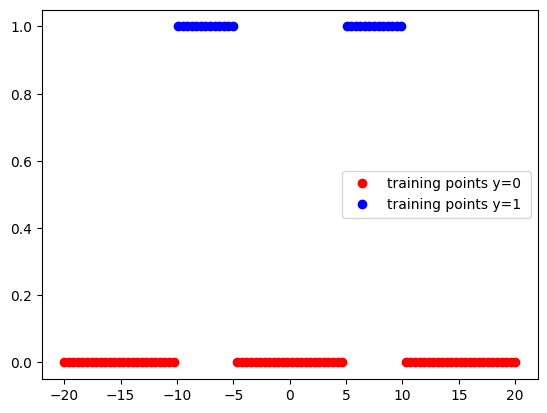

In [47]:
PlotStuff(data_set.x,data_set.y,leg=False)

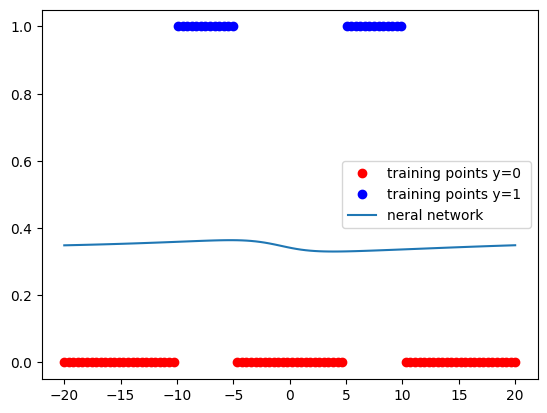

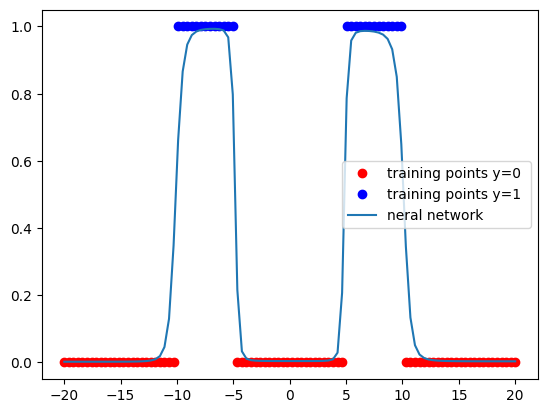

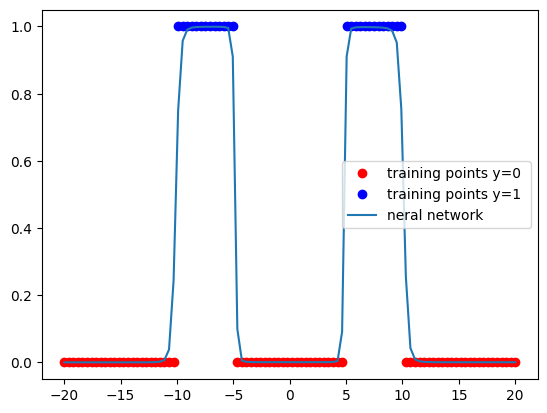

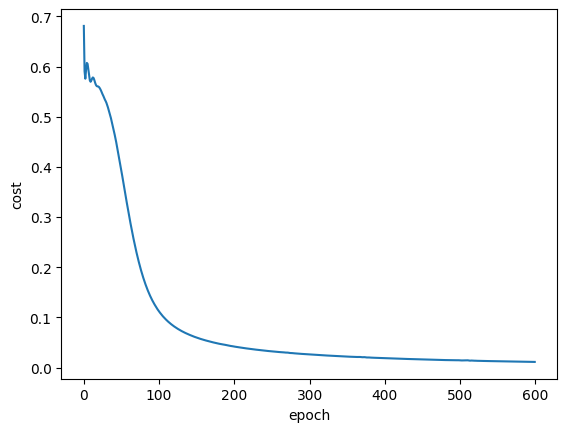

In [49]:
torch.manual_seed(0)
model=neural_net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

In [51]:
torch.manual_seed(0)

In [52]:
model_sequen = nn.Sequential(nn.Linear(1,9),nn.Sigmoid(),nn.Linear(9,1),nn.Sigmoid())

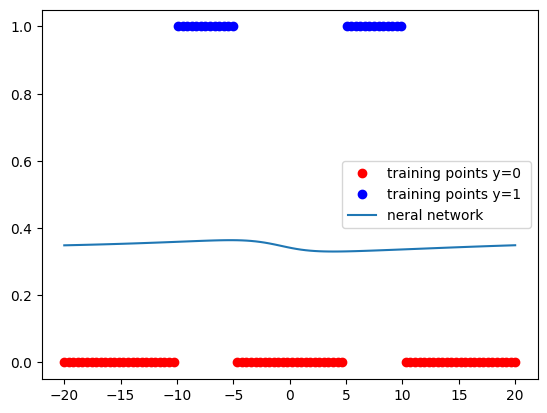

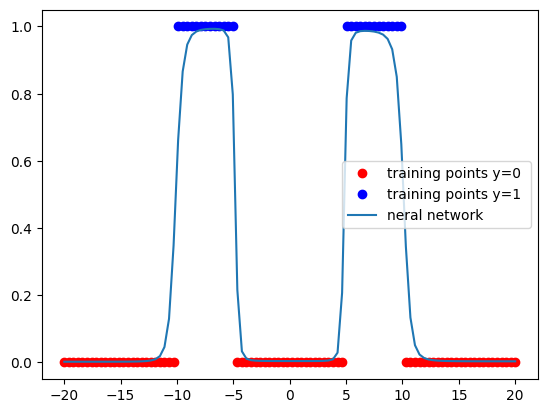

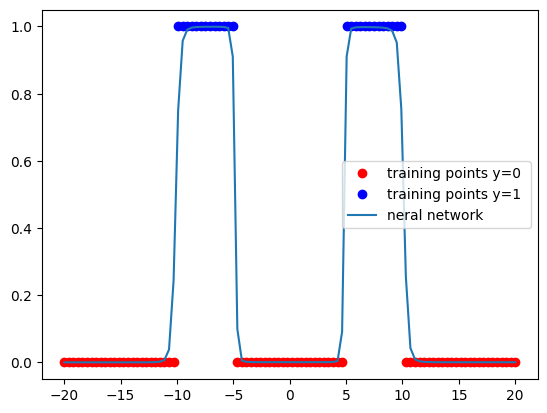

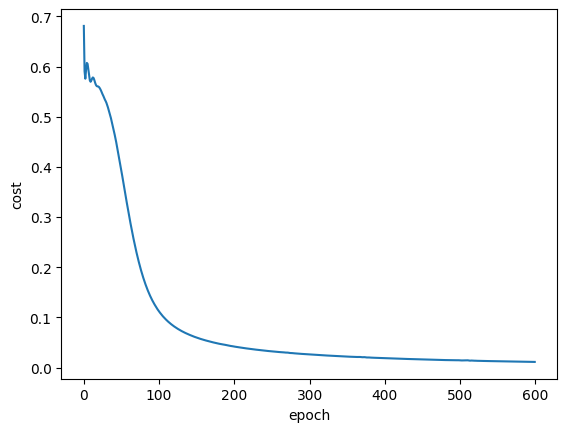

In [53]:
# Hyperparameters and setup
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_sequen.parameters(), lr=learning_rate)

# Assuming data_set is already defined (e.g., using TensorDataset)
train_loader = DataLoader(dataset=data_set, batch_size=100)

# Call your training function
COST = train(data_set, model_sequen, criterion, train_loader, optimizer, epochs=600, plot_number=200)

Neural Networks with multi dimensional input

In [54]:
# Import the libraries we need for this lab



import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [55]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [56]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [57]:
# Define the class Net with one hidden layer

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer
        self.linear1 = nn.Linear(D_in, H)
        #output layer
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [58]:
# Define the train model

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

    return COST

In [59]:
# Define the class XOR_Data

class XOR_Data(Dataset):

    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])

            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])

            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

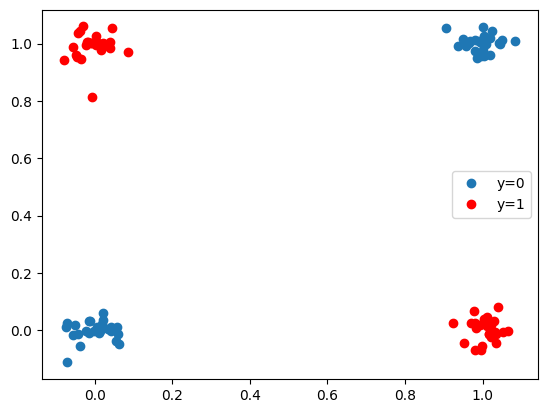

In [60]:
# Create dataset object

data_set = XOR_Data()
data_set.plot_stuff()

In [61]:
model_one = Net(2,1,1)

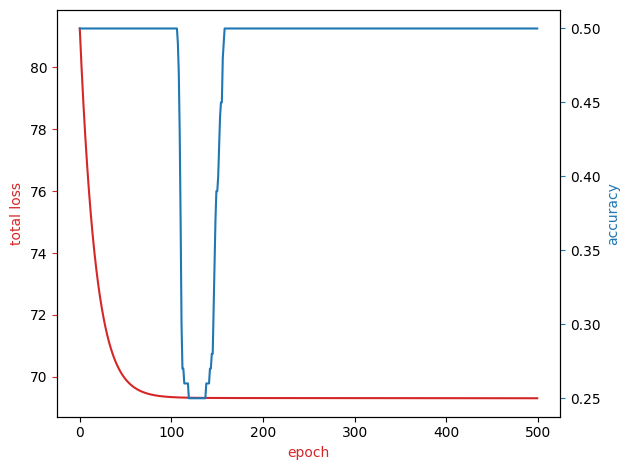

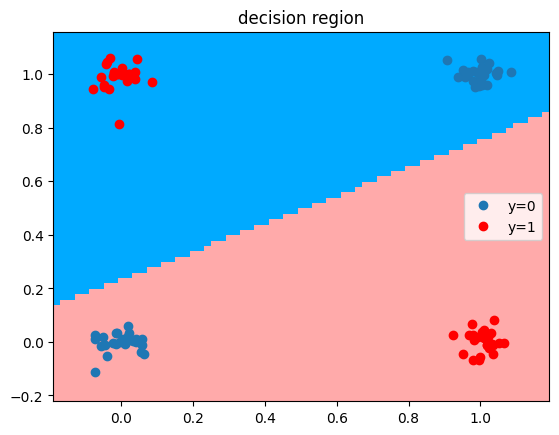

In [64]:
# Train the model

learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_one.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model_one, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model_one, data_set)

In [65]:
model_two = Net(2,2,1)

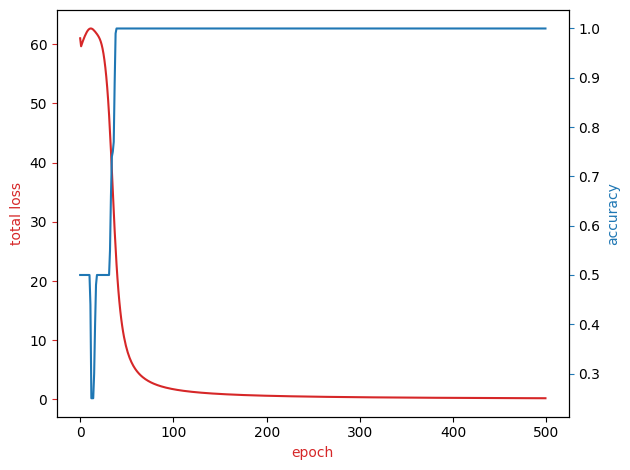

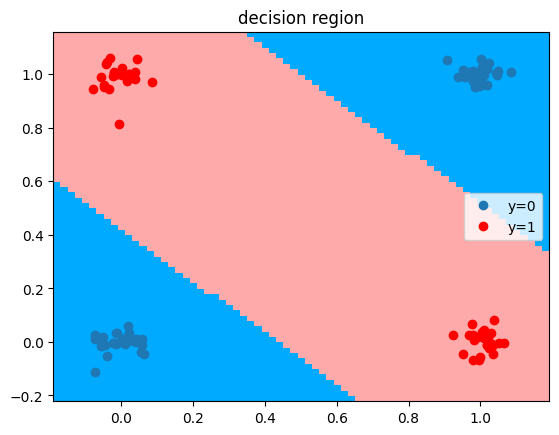

In [66]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_two.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model_two, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model_two, data_set)

In [67]:
model_three = Net(2,3,1)

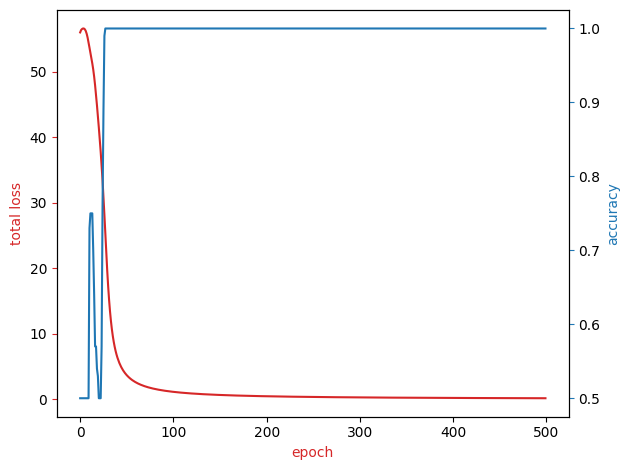

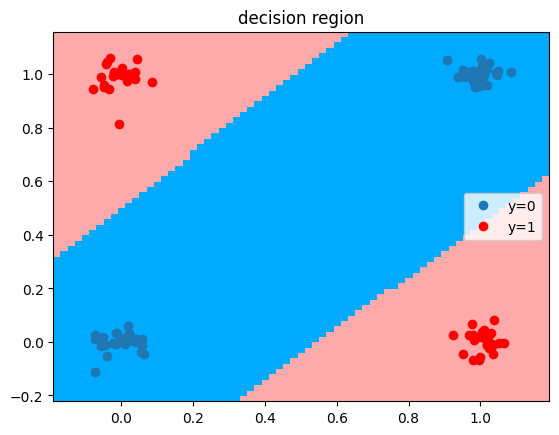

In [68]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_three.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model_three, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model_three, data_set)

Multi class Neural Networks

In [69]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [70]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

In [71]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [72]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [73]:
# Define a Neural Network class

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [74]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [75]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 512kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.72MB/s]


In [76]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

In [77]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

In [78]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [79]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [80]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [81]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [82]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

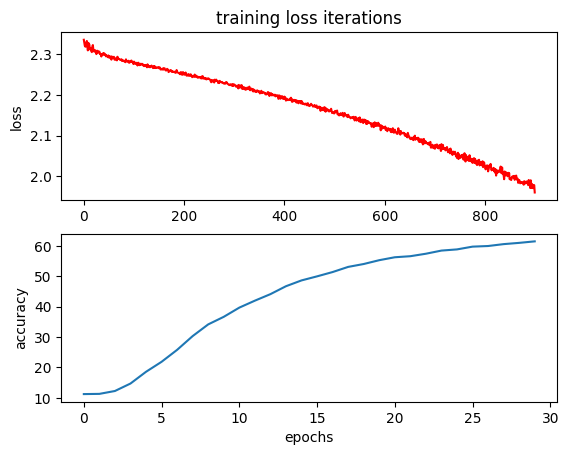

In [83]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

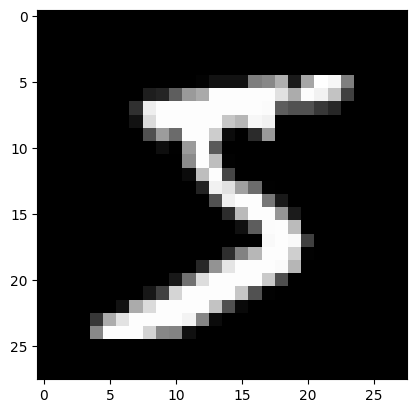

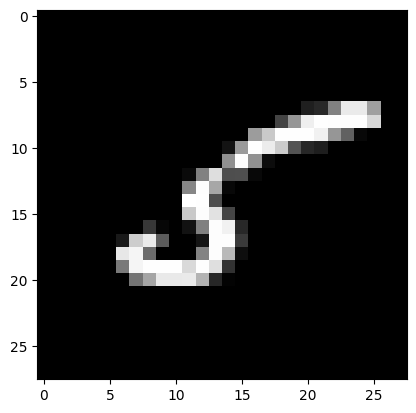

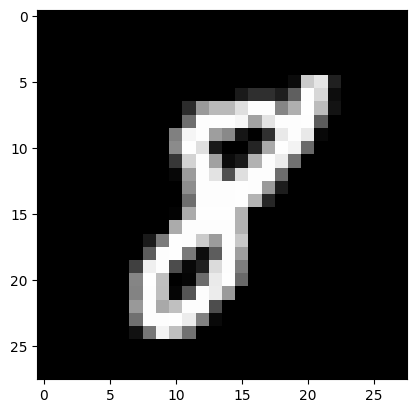

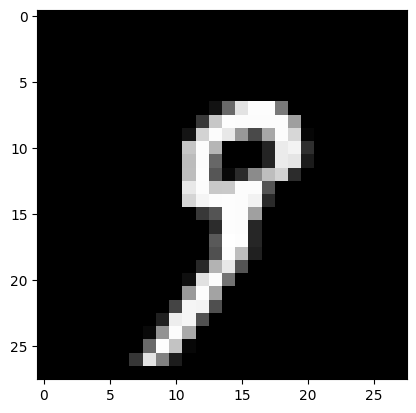

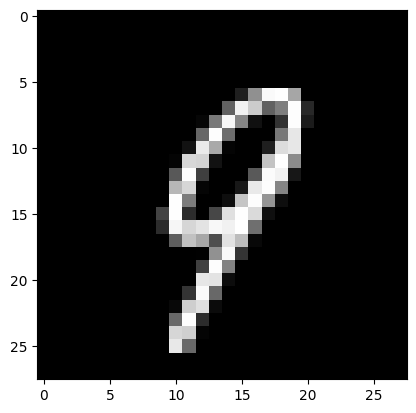

In [84]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

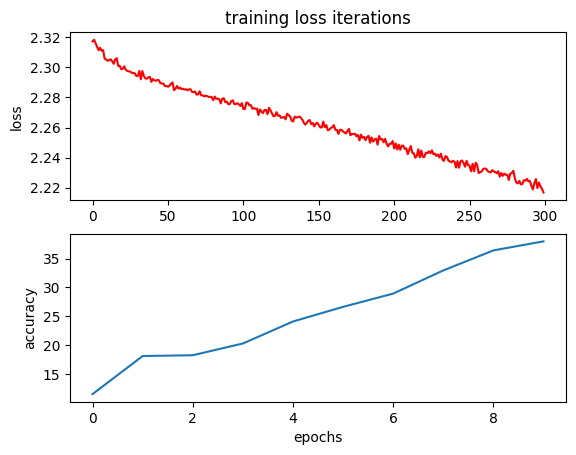

In [85]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)